In [1]:
import numpy as np
import general_billiard_cell as gbc

import seaborn as sns
sns.set()
#sns.set_style("whitegrid", {'axes.grid' : False})


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
# observables
sph_obs = lambda x: 2*x - np.pi

paths_ = [f"../newdat/precision_test/entry_sample_{i}/" for i in [200, 500, 1000, 10000]]
img_path_ = "../../AllWriteUps/Thesis/imgs/"

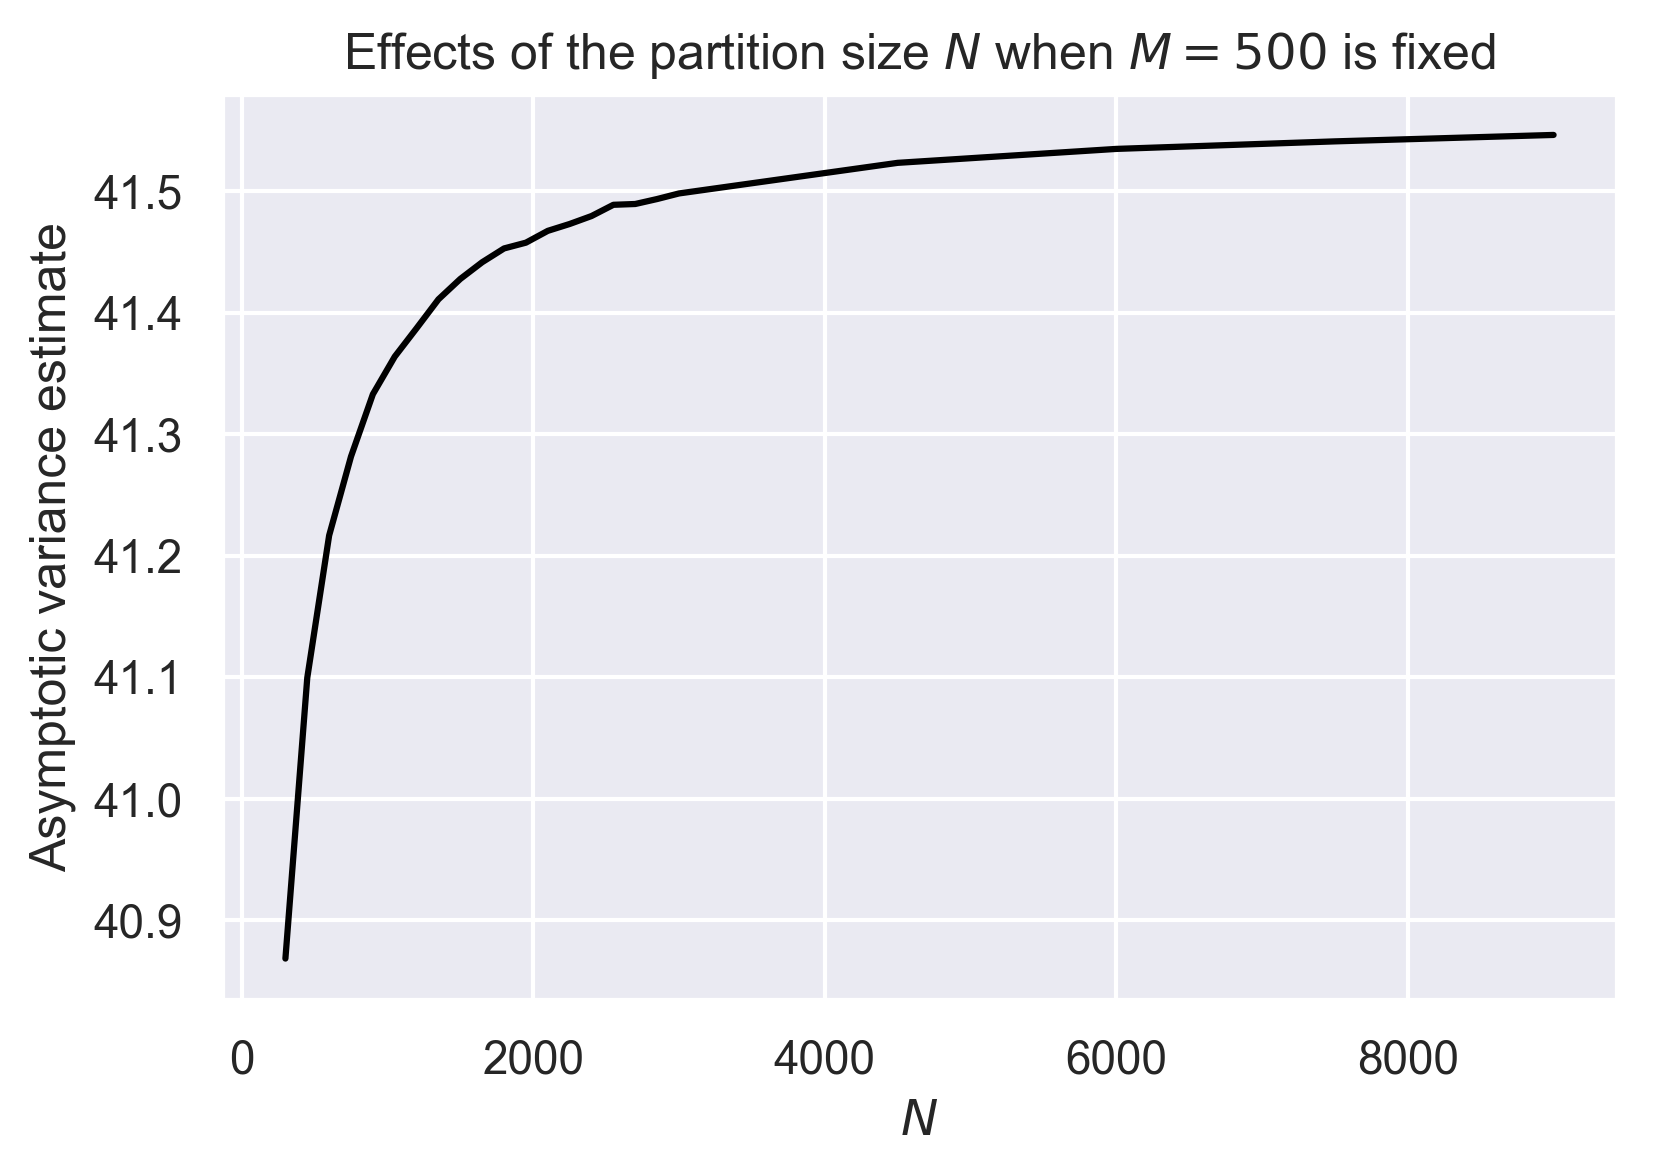

In [8]:
#---dim 500 only---#
path_ = "../newdat/precision_dim500/"
P_stacks = np.load(path_ + "p_mats.npy", allow_pickle=True)
theta_partition = np.load(path_ + "theta_partition.npy", allow_pickle=True)
xpos_partition = np.load(path_ + "keys.npy", allow_pickle=True)

P_stacks[5].shape

var_dim500 = []
for P_ in P_stacks:
    var_ = gbc.var_from_P(P_=P_, angle_bins_=theta_partition, observable_f=sph_obs)
    var_dim500.append(var_)
    
plt.plot(
    np.array(xpos_partition),
    np.array(var_dim500),
    label=r"$\dim(P)=500$",
    color="black")

plt.xlabel(r"$N$")
plt.ylabel("Asymptotic variance estimate")    

plt.title(r"Effects of the partition size $N$ when $M=500$ is fixed")
plt.savefig(filename=img_path_+"precision_by_dim.eps", bbox_inches='tight')
plt.show()

In [9]:
params_L = []
var200, var500, var1k, var10k = [], [], [], []
for k in zip(paths_, [var200, var500, var1k, var10k]):
    p_, L_ = k
    
    print(f"On path {p_}")
    #---first values---#
    P_stacks = np.load(p_ + "p_mats.npy", allow_pickle=True)
    params_L.append(np.load(p_ + "keys.npy", allow_pickle=True))
    
    for P in P_stacks:
        theta_partition = np.linspace(start=0, stop=np.pi, num=P.shape[0])
        #print(f"P shape {P.shape}, theta space {theta_partition.shape}")

        # compute the variance
        var_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition, observable_f=sph_obs)
        L_.append(var_)
var200, var500, var1k, var10k = np.array(var200), np.array(var500), np.array(var1k), np.array(var10k)

On path ../newdat/precision_test/entry_sample_200/
On path ../newdat/precision_test/entry_sample_500/
On path ../newdat/precision_test/entry_sample_1000/
On path ../newdat/precision_test/entry_sample_10000/


In [10]:
params200, params500, params1k, params10k = [np.array(L) for L in params_L]

In [11]:
len(var200), len(var500), len(var1k), len(var10k)

(50, 50, 50, 50)

In [12]:
var200[-1], var500[-1], var1k[-1], var10k[-1]

(41.593950211698576, 41.71801375461825, 41.76604240033626, 41.80968029910131)

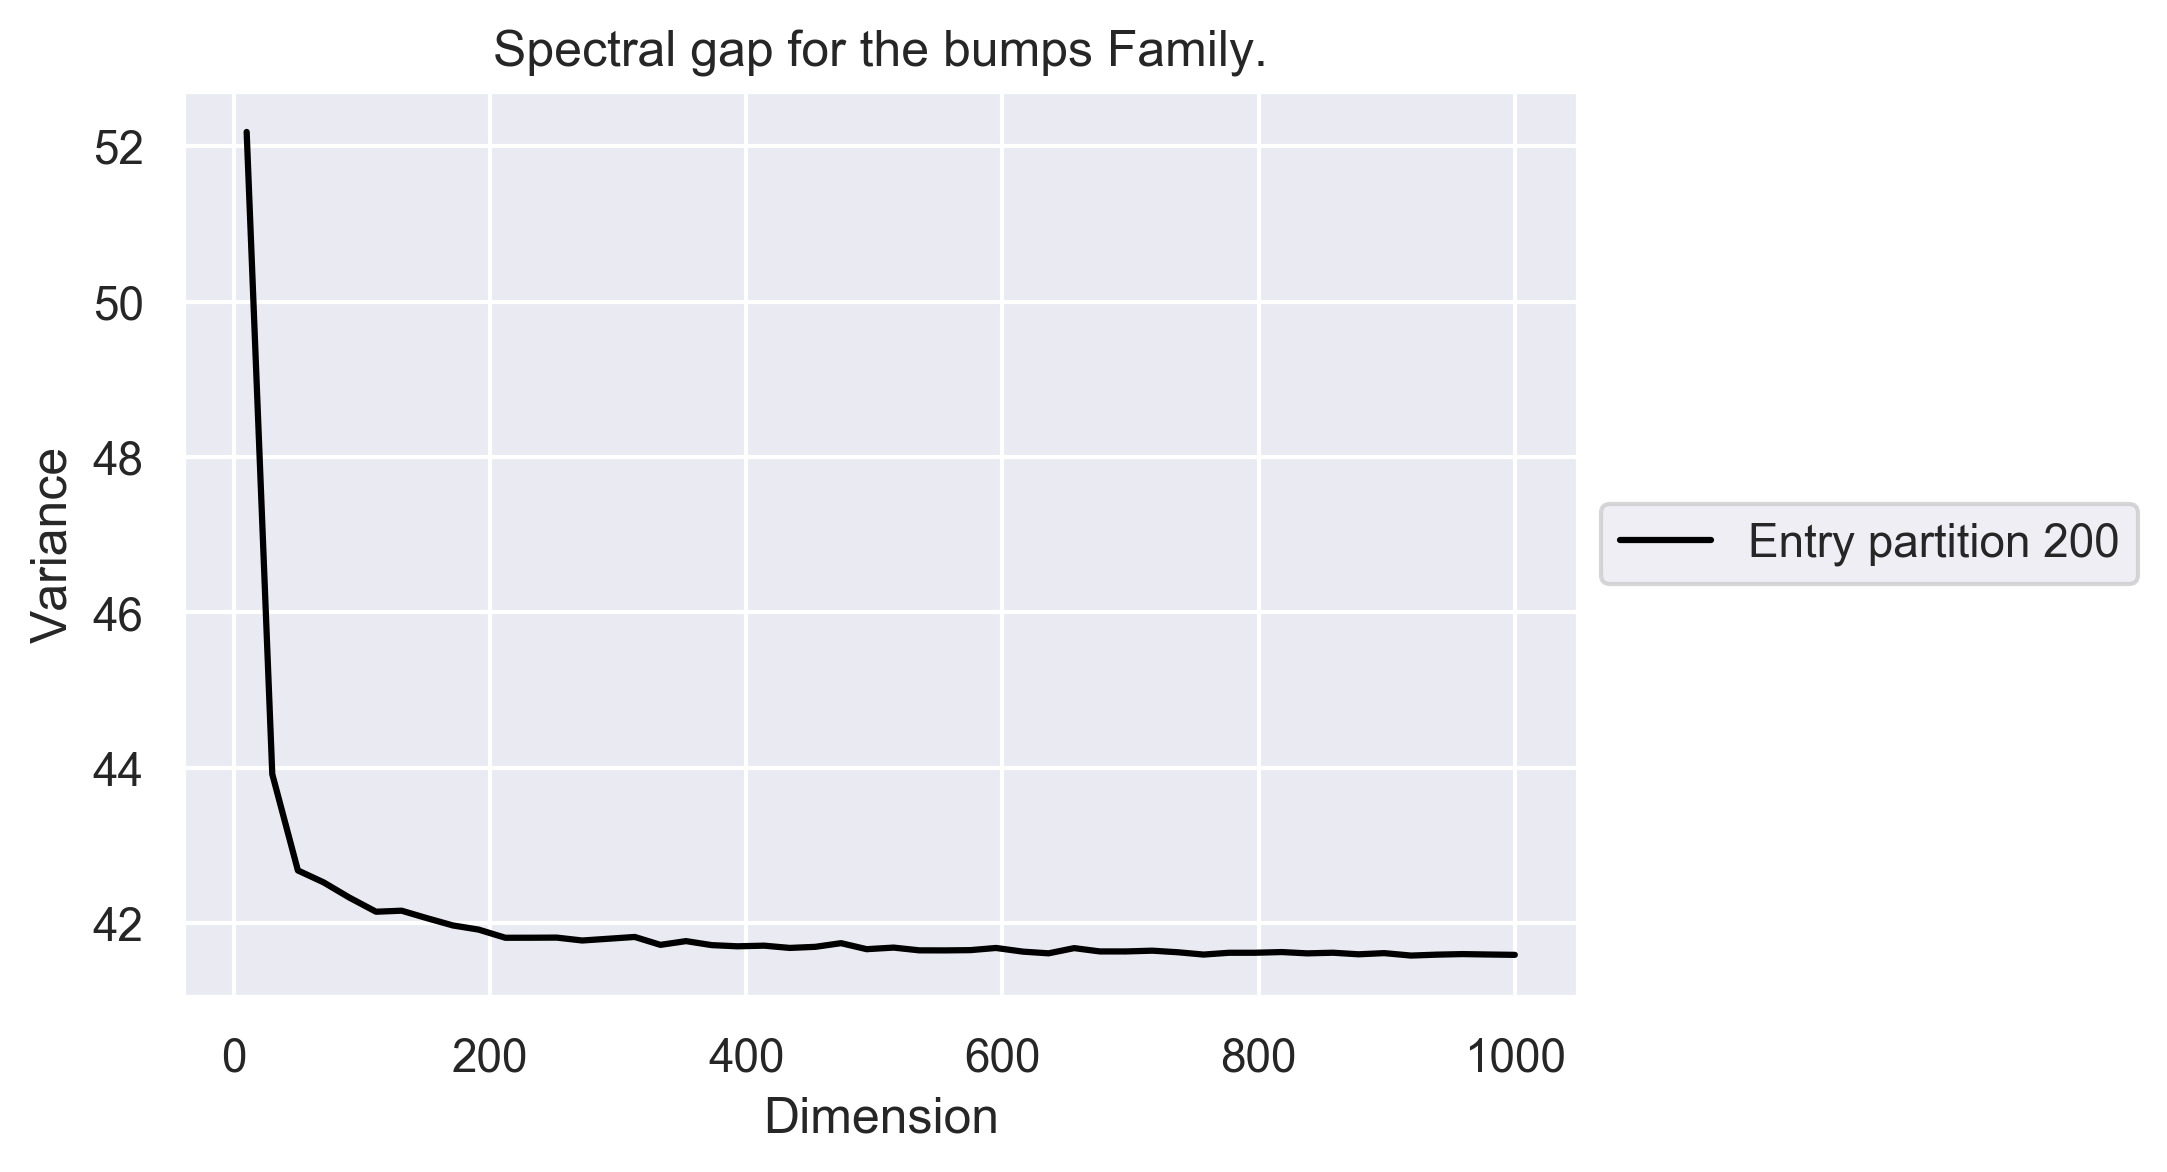

In [13]:
plt.plot(
    params200,
    var200,
    label=f"Entry partition 200",
    color="black")

plt.xlabel("Dimension")
plt.ylabel("Variance")    

plt.title("Spectral gap for the bumps Family.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
cut = 60
low_cut = 5

In [15]:
 ["1", "o", "x", "|", "_"]

['1', 'o', 'x', '|', '_']

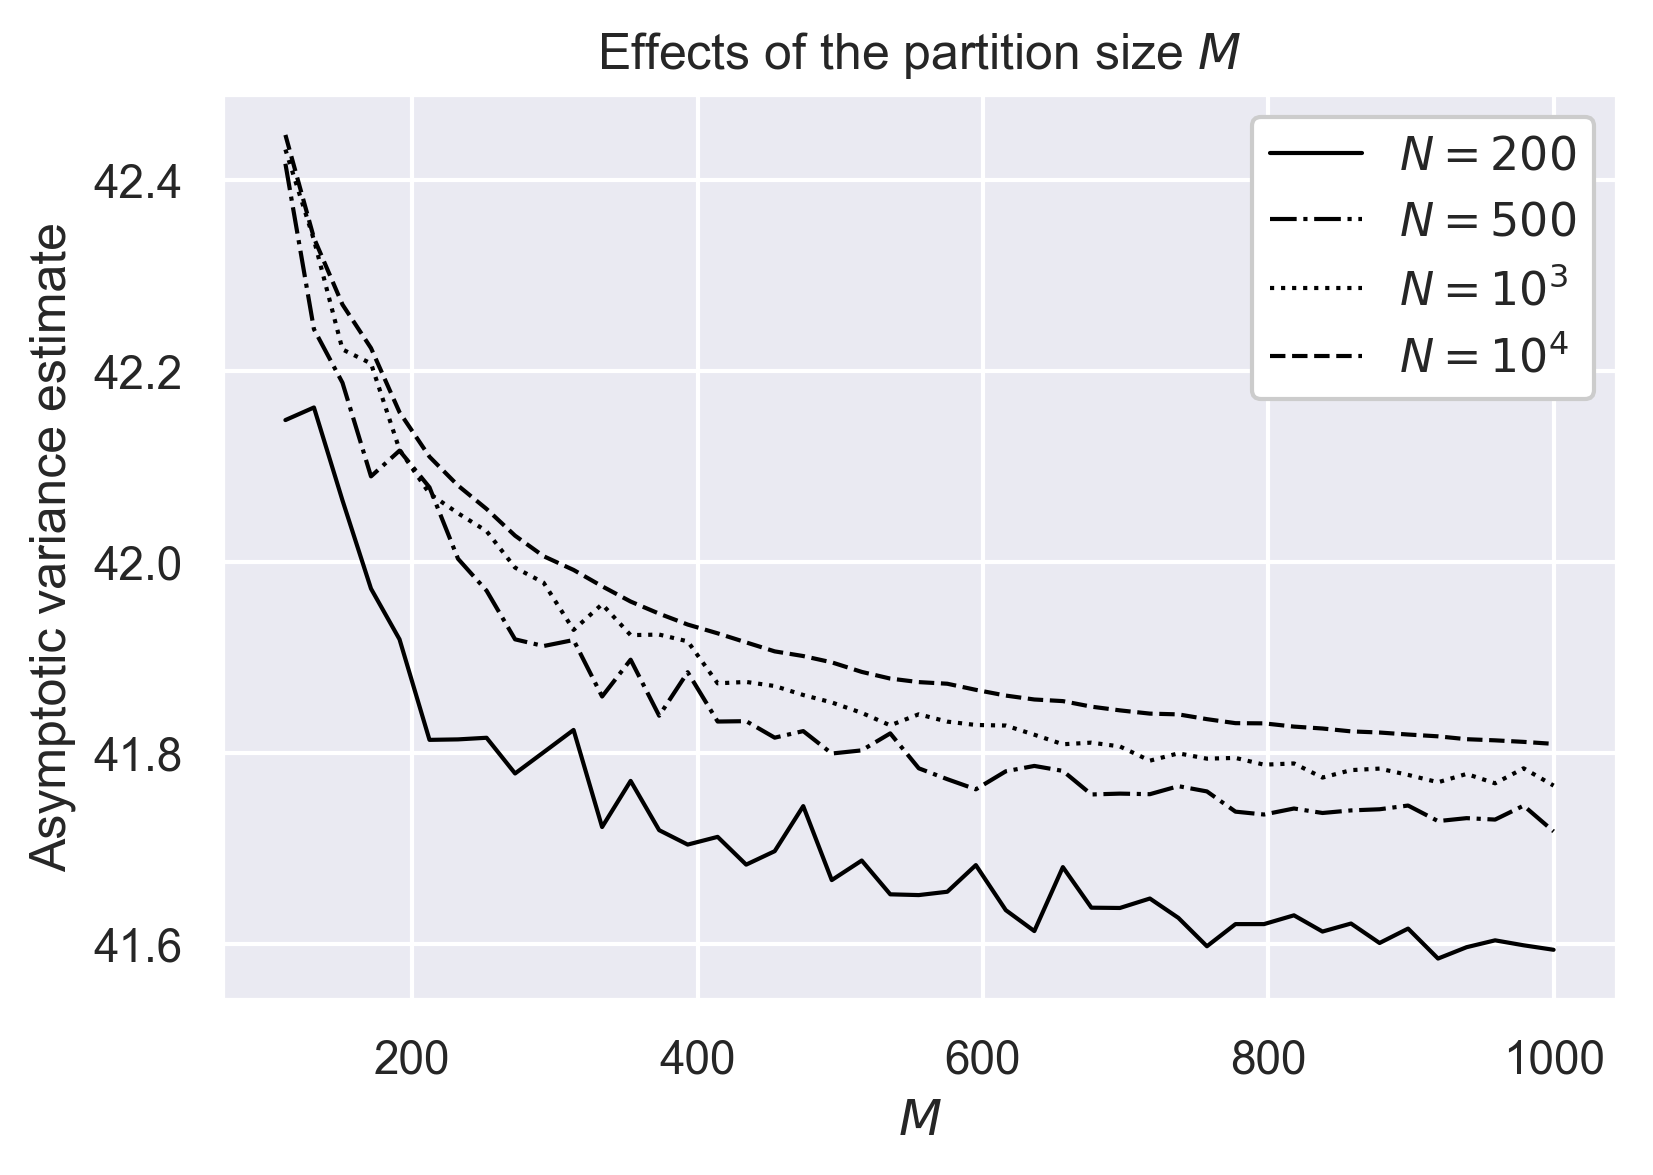

In [16]:
M = 4

plt.plot(
    params200[low_cut:],
    np.round(var200[low_cut:], M),
    label=f"$N=200$",
    color="black",
    linewidth=1,
    ls="-"
)

plt.plot(
    params500[:cut][low_cut:],
    np.round(var500[:cut][low_cut:], M),
    label=f"$N=500$",
    color="black", 
    fillstyle="none",
    #marker="o",
    ls="-.",
    linewidth=1
)


plt.plot(
    params1k[:cut][low_cut:],
    np.round(var1k[:cut][low_cut:], M),
    label=r"$N=10^3$",
    color="black",
    fillstyle="none",
    #marker="x",
    ls=":",
    linewidth=1
)


plt.plot(
    params10k[low_cut:],
    np.round(var10k[low_cut:], M),
    label=r"$N=10^4$",
    color="black",
    fillstyle="none",
    #marker="x",
    ls="--",
    linewidth=1
)

plt.xlabel(r"$M$")
plt.ylabel("Asymptotic variance estimate")    

plt.title(r"Effects of the partition size $M$")
plt.legend(loc='top-left', facecolor="white", framealpha=1)

plt.savefig(filename=img_path_+"precision_by_xpart.eps", bbox_inches='tight')
plt.show()